In [854]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import HeatMap

In [855]:
file_path = "Normalized_Tables\Main_data_Table.csv"
main_data = pd.read_csv(file_path)
main_data

,IndicatorCode,Country_Code,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending,Year_Group,PeriodRangeID
0,SDGFPALL,UGA,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021,2021-2021,1
1,SDGFPALL,NER,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021,2020-2021,1
2,SDGFPALL,BFA,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021,2020-2021,1
3,SDGFPALL,VNM,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021,2020-2021,1
4,SDGFPALL,CIV,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,2020,2020-2020,2
...,...,...,...,...,...,...,...,...,...,...,...
132,SDGFPALL,AZE,Female,15-49 years,21.5,The global indicator represents all women of r...,EN,2006,2006,2006-2006,6
133,SDGFPALL,CPV,Female,15-49 years,73.2,The global indicator represents all women of r...,EN,2005,2005,2005-2005,7
134,SDGFPALL,FRA,Female,15-49 years,95.5,The global indicator represents all women of r...,EN,2004,2005,2004-2005,7
135,SDGFPALL,ROU,Female,15-49 years,46.5,The global indicator represents all women of r...,EN,2004,2004,2004-2004,7


In [856]:
file_path = "Normalized_Tables\Countries_Table.csv"
country = pd.read_csv(file_path)
country

,Country_Code,Country,Patents_Continent_Code
0,UGA,Uganda,AFR
1,NER,Niger,AFR
2,BFA,Burkina Faso,AFR
3,VNM,Viet Nam,WPR
4,CIV,Cote d'Ivoire,AFR
...,...,...,...
131,AZE,Azerbaijan,EUR
132,CPV,Cabo Verde,AFR
133,FRA,France,EUR
134,ROU,Romania,EUR


In [857]:
file_path = "Normalized_Tables\Locations_Table.csv"
continents= pd.read_csv(file_path)
continents

,Patents_Continent_Code,ParentLocation_Continent
0,AFR,Africa
1,WPR,Western Pacific
2,EUR,Europe
3,AMR,Americas
4,EMR,Eastern Mediterranean
5,SEAR,South-East Asia


In [858]:
# Aggregate the data by country
country_data = main_data.groupby('Country_Code')['Planning_Value_Rate'].mean().reset_index()
country_data

,Country_Code,Planning_Value_Rate
0,AFG,42.1
1,AGO,29.8
2,ALB,6.3
3,ARG,80.3
4,ARM,40.2
...,...,...
131,WSM,27.0
132,YEM,40.5
133,ZAF,79.7
134,ZMB,65.9


In [859]:
# Merge with country names
country_data = country_data.merge(country, on='Country_Code')

In [860]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\ranar\AppData\Local\Temp\ipykernel_28184\2515139955.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [861]:
# Merge with our data
world = world.merge(country_data, how='left', left_on='iso_a3', right_on='Country_Code')


# Geographical Map (.HTML Files Saved)

In [862]:
from folium.plugins import HeatMap

In [863]:
# Create a list of coordinates and values for the heatmap
heat_data = [
    [row['geometry'].centroid.y, row['geometry'].centroid.x, row['Planning_Value_Rate']]
    for _, row in world.dropna(subset=['Planning_Value_Rate']).iterrows()
]

In [864]:
# Create a folium map centered at a specific location (e.g., World map)
m = folium.Map(location=[0, 0], zoom_start=2)

In [865]:
# # Add HeatMap with custom gradient (Dark Maroon to Neon Green)
HeatMap(
    heat_data,
    gradient={0.0: '#800000', 0.5: 'red', 0.7: 'orange', 0.8: 'lime', 1.0: 'green'},
    radius=20,  # Adjust the radius of each point
    blur=10,    # Adjust the blur intensity for smoother heatmap appearance
    min_opacity=0.5,  # Minimum opacity for points
    max_val=float(world['Planning_Value_Rate'].max()) # Maximum value for the heatmap scale
).add_to(m)

C:\Users\ranar\AppData\Local\Temp\ipykernel_28184\2952387263.py:2: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(


In [866]:
m

In [867]:
for _, row in world.dropna(subset=['Planning_Value_Rate']).iterrows():
    folium.CircleMarker(
        location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
        radius=1,  # Adjust the size of the marker here (smaller size)
        popup=f"{row['Country']}<br>Planning Value Rate: {row['Planning_Value_Rate']}%",
        tooltip=f"{row['Country']} - {row['Planning_Value_Rate']}%",
        fill=True,
        color='black',  # Marker color
        fill_opacity=0.3
    ).add_to(m)

In [868]:
# Save the map to an HTML file
m.save("planning_value_rate_heatmap.html")

In [869]:
m

# Another Geo Map

In [870]:
# Add Choropleth layer
folium.Choropleth(
    geo_data=world,
    name="choropleth",
    data=world,
    columns=["iso_a3", "Planning_Value_Rate"],
    key_on="feature.properties.iso_a3",
    fill_color="RdYlGn",  # Red to Green color scale
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Planning Value Rate (%)",
).add_to(m)

In [871]:
# Add markers with tooltips
for _, row in world.dropna(subset=['Planning_Value_Rate']).iterrows():
    folium.CircleMarker(
        location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
        radius=2,  # Adjust the size of the marker here (smaller size)
        popup=f"{row['Country']}<br>Planning Value Rate: {row['Planning_Value_Rate']}%",
        tooltip=f"{row['Country']} - {row['Planning_Value_Rate']}%",
        fill=True,
        color='black',  # Marker color
        fill_opacity=0.3
    ).add_to(m)

In [872]:
# Save the map to an HTML file
m.save("planning_value_rate_map.html")

In [873]:
m

In [874]:
file_path = "Normalized_Tables\Period_Ranges_Table.csv"
Period_Range=pd.read_csv(file_path)
Period_Range

,Year_Period_Range,PeriodRangeID
0,2021-2023,1
1,2018-2020,2
2,2015-2017,3
3,2012-2014,4
4,2009-2011,5
5,2006-2008,6
6,2003-2005,7
7,Out of Range,8


In [875]:
# Merge main_data with Period_Range on PeriodRangeID
merged_data = pd.merge(main_data, Period_Range, on='PeriodRangeID')

# Sort merged data by Year_Period_Range for proper plotting order
merged_data = merged_data.sort_values('Year_Period_Range')

c:\Users\ranar\.conda\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ranar\.conda\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


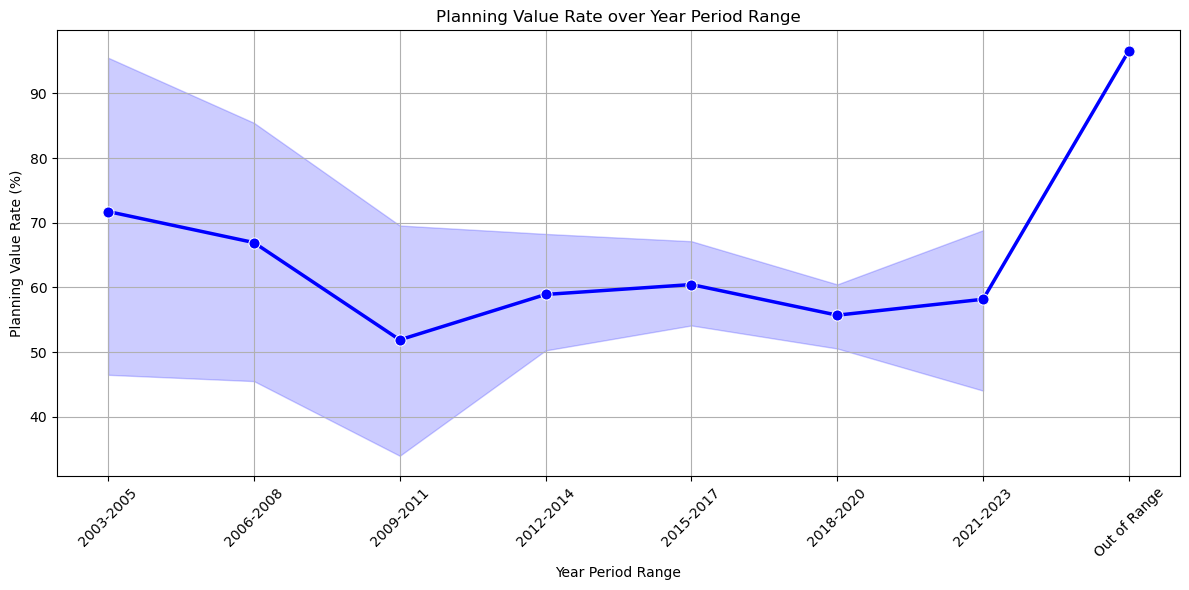

In [876]:
# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='Year_Period_Range', y='Planning_Value_Rate', marker='o', markersize=8, color='b', linewidth=2.5)
plt.title('Planning Value Rate over Year Period Range')
plt.xlabel('Year Period Range')
plt.ylabel('Planning Value Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()